In [51]:
import torch
from torch import nn

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
data = pd.read_csv("giaitich1.csv")
print(data.head())
print(len(data))

   Hours  Scores
0    2.0     4.1
1    4.6     6.7
2    2.5     4.7
3    8.0     8.2
4    3.0     5.0
24


In [54]:
train_data = data.sample(frac=0.7, random_state=200)
print(len(train_data))
test_data = data.drop(train_data.index)
print(len(test_data))
# train_data = data[:int((len(data) * 0.7))]
# test_data = data[int(len(data) * 0.7):]


17
7


In [55]:
X_train = torch.tensor(train_data["Hours"].values)
y_train = torch.tensor(train_data["Scores"].values)
X_test = torch.tensor(test_data["Hours"].values)
y_test = torch.tensor(test_data["Scores"].values)


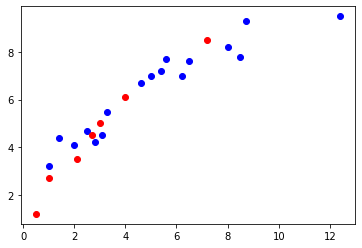

In [56]:
plt.plot(X_train, y_train, "bo")
plt.plot(X_test, y_test, "ro")
plt.show()

In [57]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    def forward(self, x):
        return self.weight * x + self.bias

In [58]:
from pickletools import optimize

torch.manual_seed(42)
model = LinearRegressionModel()
print(model.state_dict())
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [59]:
epochs = 300
for i in range (epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
with torch.inference_mode():
    y_pred = model(X_test)

tensor([13.6818], grad_fn=<AddBackward0>)


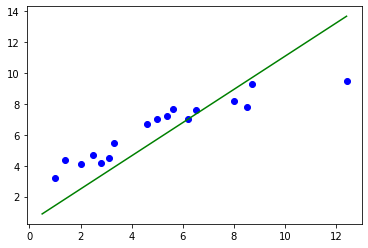

In [60]:
plt.plot(X_train, y_train, "bo")
print(model(torch.tensor(max(data["Hours"]))))
X_ten = torch.tensor([max(data["Hours"]), min(data["Hours"])])
y_ten = torch.tensor([model(max(data["Hours"])), model(min(data["Hours"]))])
plt.plot(X_ten, y_ten, "g")
# plt.show()